In [1]:
#Importing required packages
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading .csv file to Pandas dataframe
ad_food_effects= pd.read_csv('CAERS_ASCII_2004_2017Q2.csv')

In [3]:
#Exploring the information of the data
ad_food_effects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90786 entries, 0 to 90785
Data columns (total 12 columns):
RA_Report #                        90786 non-null int64
RA_CAERS Created Date              90786 non-null object
AEC_Event Start Date               53653 non-null object
PRI_Product Role                   90786 non-null object
PRI_Reported Brand/Product Name    90786 non-null object
PRI_FDA Industry Code              90786 non-null int64
PRI_FDA Industry Name              90786 non-null object
CI_Age at Adverse Event            52926 non-null float64
CI_Age Unit                        90786 non-null object
CI_Gender                          90786 non-null object
AEC_One Row Outcomes               90786 non-null object
SYM_One Row Coded Symptoms         90781 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 8.3+ MB


In [4]:
#Renaming the column names
ad_food_effects.columns= ['Report #', 'Created Date', 'Start Date', 'Product Role', 'Product Brand/Name', 'Industry Code', 'Industry Name', 'Age', 'Age Unit', 'Gender', 'Outcomes', 'Symptoms']

In [5]:
#Exploring the duplicates
ad_food_effects[ad_food_effects.duplicated(['Report #', 'Product Brand/Name'], keep=False)]

,Report #,Created Date,Start Date,Product Role,Product Brand/Name,Industry Code,Industry Name,Age,Age Unit,Gender,Outcomes,Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
243,65973,1/22/2004,NaN,Suspect,PREMIER PIGMENTS PERMANENT TATTOO PIGMENTS: RO...,53,Cosmetics,51.0,Year(s),Female,NON-SERIOUS INJURIES/ ILLNESS,"BLISTER, SWELLING FACE, CHEILITIS, PRURITUS, H..."
244,65973,1/22/2004,NaN,Suspect,PREMIER PIGMENTS PERMANENT TATTOO PIGMENTS: RO...,53,Cosmetics,51.0,Year(s),Female,NON-SERIOUS INJURIES/ ILLNESS,"SWELLING FACE, CHEILITIS, BLISTER, PRURITUS, H..."
281,66120,1/28/2004,NaN,Suspect,CRAB OMELET,16,Fishery/Seafood Prod,NaN,Not Available,Not Available,"NON-SERIOUS INJURIES/ ILLNESS, VISITED AN ER","FEELING ABNORMAL, AMNESIA, ABDOMINAL PAIN, DIA..."
282,66120,1/28/2004,NaN,Suspect,CRAB OMELET,16,Fishery/Seafood Prod,NaN,Not Available,Not Available,"NON-SERIOUS INJURIES/ ILLNESS, VISITED AN ER","FEELING ABNORMAL, AMNESIA, VOMITING, ABDOMINAL..."
299,66157,1/28/2004,7/17/2003,Suspect,KRAFT ZESTY ITALIAN,27,Dressing/Condiment,NaN,Not Available,Female,NON-SERIOUS INJURIES/ ILLNESS,"FEELING ABNORMAL, BALANCE DISORDER, DIZZINESS,..."
300,66157,1/28/2004,7/17/2003,Suspect,KRAFT ZESTY ITALIAN,27,Dressing/Condiment,NaN,Not Available,Female,NON-SERIOUS INJURIES/ ILLNESS,"FEELING ABNORMAL, DIZZINESS, NAUSEA, ABDOMINAL..."
586,67149,3/5/2004,1/31/2004,Suspect,ENZYMATIC THERAPY EPHEDRA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,Not Available,Male,NON-SERIOUS INJURIES/ ILLNESS,"EMERGENCY CARE EXAMINATION, HEART RATE INCREAS..."
587,67149,3/5/2004,1/31/2004,Suspect,ENZYMATIC THERAPY EPHEDRA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,Not Available,Male,NON-SERIOUS INJURIES/ ILLNESS,"EMERGENCY CARE EXAMINATION, HEART RATE INCREAS..."


In [6]:
#Dropping the duplicates
ad_food_effects=ad_food_effects.drop_duplicates(subset=['Report #', 'Product Brand/Name'], keep='first')

In [7]:
#Dropping few rows without symptoms of the suspect
ad_food_effects=ad_food_effects.drop([4598, 6171, 18406, 39364, 48914])

In [8]:
#Dropping the NaN's in Age column
ad_food_effects=ad_food_effects.dropna(subset=['Age'])

In [9]:
#Extracting product name(toddler) and filling missing values
toddler= ad_food_effects[ad_food_effects['Product Brand/Name'].str.contains("(?:\s|^)TODDLER(?:\s|$)")][['Age']].fillna(18)
#Assigning toddler to the original dataframe
ad_food_effects.loc[ad_food_effects['Product Brand/Name'].str.contains("(?:\s|^)TODDLER(?:\s|$)"), 'Age']=toddler

In [10]:
#Extracting product name(other baby products) and filling missing values
baby= ad_food_effects[ad_food_effects['Industry Code']==40][['Age']].fillna(12)
#Assigning toddler to the original dataframe
ad_food_effects.loc[ad_food_effects['Industry Code']==40, 'Age']=baby

In [11]:
#Correcting Outliers of Age 736 months to 61 years
ad_food_effects.loc[ad_food_effects['Report #']==109769, 'Age']=61
ad_food_effects.loc[ad_food_effects['Report #']==109769, 'Age Unit']='Year(s)'

In [12]:
#Correcting Outliers of Age 112 years to 12 years
ad_food_effects.loc[ad_food_effects['Report #']==103361, 'Age']=12

In [13]:
#Correcting Outliers of Age 250 years to 25 years
ad_food_effects.loc[ad_food_effects['Report #']==110300, 'Age']=25

In [14]:
#Correcting Outliers of Age 155 years to 55 years
ad_food_effects.loc[ad_food_effects['Report #']==175186, 'Age']=55

In [15]:
#Correcting Outliers of Age 151 years to 51 years
ad_food_effects.loc[ad_food_effects['Report #']==178266, 'Age']=51

In [16]:
#Correcting Outliers of Age 167 years to 67 years
ad_food_effects.loc[ad_food_effects['Report #']==182151, 'Age']=67

In [17]:
#Correcting Outliers of Age 156 years to 56 years
ad_food_effects.loc[ad_food_effects['Report #']==197010, 'Age']=56

In [18]:
#Correcting Outliers of Age 115 years to 15 years
ad_food_effects.loc[ad_food_effects['Report #']==193984, 'Age']=15

In [19]:
#Correcting Outliers of Age 76 Decades to years
ad_food_effects.loc[ad_food_effects['Report #']==71436, 'Age Unit']= 'Year(s)'

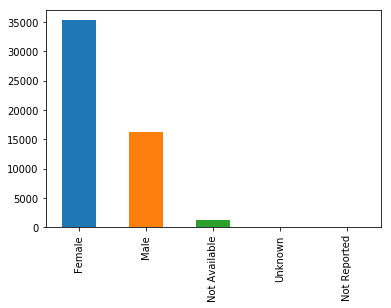

In [20]:
#Gender value count and visualization
gender= ad_food_effects.Gender.value_counts()
gender.plot.bar()

##### There are almost 67% of the issues reported by Female

In [21]:
#Industry value counts 
ad_food_effects['Industry Name'].value_counts()

Vit/Min/Prot/Unconv Diet(Human/Animal)    36073
Cosmetics                                  4995
Nuts/Edible Seed                           1229
Vegetables/Vegetable Products              1160
Fishery/Seafood Prod                       1042
Baby Food Prod                              966
Dietary Conv Food/Meal Replacements         954
Bakery Prod/Dough/Mix/Icing                 858
Soft Drink/Water                            756
Fruit/Fruit Prod                            674
Milk/Butter/Dried Milk Prod                 611
Cereal Prep/Breakfast Food                  547
Mult Food Dinner/Grav/Sauce/Special         345
Snack Food Item                             327
Coffee/Tea                                  311
Ice Cream Prod                              254
Choc/Cocoa Prod                             233
Candy W/O Choc/Special/Chew Gum             230
Food Additives (Human Use)                  194
Spices, Flavors And Salts                   127
Cheese/Cheese Prod                      

##### Based on the Above value counts, 68% of the total reports issued are for Vit/Min/Prot/Unconv Diet Food Industry.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'count')

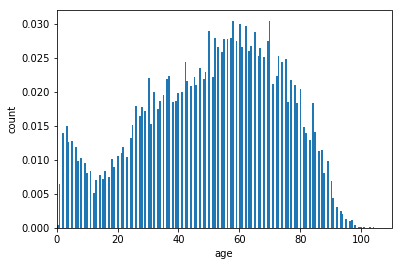

In [22]:
#Visualization of Age distribution
bin_values = np.arange(start=ad_food_effects['Age'].min(), stop=ad_food_effects['Age'].max(), step=0.6)
plt.hist(ad_food_effects['Age'],bins=bin_values, normed=True)
plt.xlim(0,110, 10)
plt.xlabel('age')
plt.ylabel('count')

In [24]:
#Visualization of 40 major Outcomes
outcomes_se= ad_food_effects.Outcomes.value_counts()
df= pd.DataFrame({'outcomes':outcomes_se.index, 'count':outcomes_se.values})
df1= df[0:40]

Text(0.5,1,'First 40 major Outcomes')

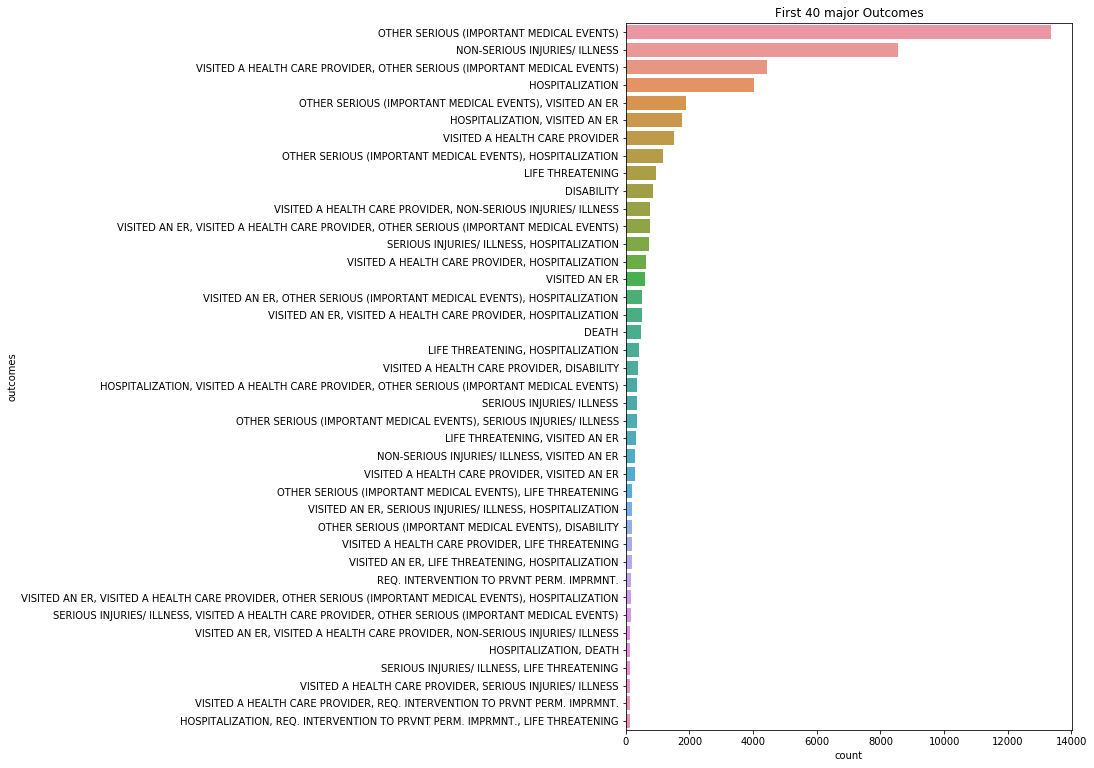

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,13))
sns.barplot(x= 'count', y='outcomes', data=df1).set_title('First 40 major Outcomes')

##### Based on the observation above,
1. We can further analyze the major food products in Vit/Min/Prot/Unconv Diet Industry
2. What are the majot Outcomes on Female reported issues
3. How many Serious and Non-Serious issues reported by Female
4. Analyze Serious and Non-Serious issues based on the Age group